In [1]:
import pandas as pd
import numpy as np

In [2]:
diabetes_df = pd.read_csv('diabetes_preprocessed.csv')
diabetes_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,0.325581,1,0,0,0,0,1,...,0,5,0.6,0.5,1,0,0.666667,4,3,0.0
1,0,0,0,0.151163,1,0,0,1,0,0,...,1,3,0.0,0.0,0,0,0.500000,6,1,0.0
2,1,1,1,0.186047,0,0,0,0,1,0,...,1,5,1.0,1.0,1,0,0.666667,4,8,0.0
3,1,0,1,0.174419,0,0,0,1,1,1,...,0,2,0.0,0.0,0,0,0.833333,3,6,0.0
4,1,1,1,0.139535,0,0,0,1,1,1,...,0,2,0.1,0.0,0,0,0.833333,5,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,0,1,1,0.162791,1,0,0,1,0,1,...,0,1,0.0,0.0,0,0,0.833333,5,6,0.0
134569,1,1,1,0.279070,1,0,0,1,1,1,...,0,3,0.1,0.0,0,1,1.000000,4,3,0.0
134570,0,1,1,0.186047,1,0,0,1,1,1,...,0,2,0.0,0.0,0,0,0.666667,5,8,0.0
134571,1,1,1,0.197674,0,0,0,1,1,0,...,0,3,0.0,0.0,0,1,0.750000,6,8,0.0


In [3]:
print(diabetes_df['Diabetes_binary'].value_counts())

Diabetes_binary
0.0    115875
1.0     18697
Name: count, dtype: int64


### Naive Random Forest Classifier (no CV, skewed)

In [4]:
# prompt: fit random forest classifier for diabetes_df, predicting 'Diabetes_binary'

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd # import pandas for data manipulation if not already imported
import numpy as np


# Define features (X) and target (y)
X = diabetes_df.drop('Diabetes_binary', axis=1)
y = diabetes_df['Diabetes_binary']

# Before splitting, remove rows with NaN in 'Diabetes_binary' from the DataFrame:
diabetes_df = diabetes_df.dropna(subset=['Diabetes_binary'])

# Redefine X and y after removing NaN values
X = diabetes_df.drop('Diabetes_binary', axis=1)
y = diabetes_df['Diabetes_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# prompt: show the accuracy, f1 score of the model

from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


Accuracy: 0.8600037154003344
F1 Score: 0.2460984393757503


Very high accuracy which is expected since the data is very imbalanced. F1 score is very low.

In [6]:
# prompt: check the count of each target value

# Count the occurrences of each target value in the training and testing sets
print("Target value counts in y_train:")
print(diabetes_df['Diabetes_binary'].value_counts())


Target value counts in y_train:
Diabetes_binary
0.0    115875
1.0     18697
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Define features and target
X = diabetes_df.drop('Diabetes_binary', axis=1)
y = diabetes_df['Diabetes_binary']

# Initialize RandomForestClassifier with class_weight balanced
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scorers
f1 = make_scorer(f1_score)
accuracy = make_scorer(accuracy_score)

# Perform cross-validation
f1_scores = cross_val_score(rf_classifier, X, y, cv=skf, scoring=f1, n_jobs=-1)
accuracy_scores = cross_val_score(rf_classifier, X, y, cv=skf, scoring=accuracy, n_jobs=-1)

# Report results
print(f"Mean F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")


Mean F1 Score: 0.2296 ± 0.0069
Mean Accuracy: 0.8569 ± 0.0012


In [7]:
pip install imbalanced-learn

In [8]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Features and target
X = diabetes_df.drop('Diabetes_binary', axis=1)
y = diabetes_df['Diabetes_binary']

# Define pipeline with SMOTE
pipeline_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)
# accuracy = make_scorer(accuracy_score)

# Cross-validation
f1_scores_smote = cross_val_score(pipeline_smote, X, y, cv=skf, scoring=f1, n_jobs=-1)
# accuracy_scores_smote = cross_val_score(pipeline_smote, X, y, cv=skf, scoring=accuracy, n_jobs=-1)

print(f"[SMOTE] Mean F1 Score: {f1_scores_smote.mean():.4f} ± {f1_scores_smote.std():.4f}")
# print(f"[SMOTE] Mean Accuracy: {accuracy_scores_smote.mean():.4f} ± {accuracy_scores_smote.std():.4f}")


[SMOTE] Mean F1 Score: 0.3932 ± 0.0044


In [9]:
from imblearn.under_sampling import RandomUnderSampler

# Define pipeline with RandomUnderSampler
pipeline_under = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation
f1_scores_under = cross_val_score(pipeline_under, X, y, cv=skf, scoring=f1, n_jobs=-1)
# accuracy_scores_under = cross_val_score(pipeline_under, X, y, cv=skf, scoring=accuracy, n_jobs=-1)

print(f"[UnderSampling] Mean F1 Score: {f1_scores_under.mean():.4f} ± {f1_scores_under.std():.4f}")
# print(f"[UnderSampling] Mean Accuracy: {accuracy_scores_under.mean():.4f} ± {accuracy_scores_under.std():.4f}")


[UnderSampling] Mean F1 Score: 0.4244 ± 0.0031


### XGboost

In [10]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier # Import XGBoost classifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Features and target
X = diabetes_df.drop('Diabetes_binary', axis=1)
y = diabetes_df['Diabetes_binary']

# Define pipeline with SMOTE and XGBoost Classifier
pipeline_xgb_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')) # Use XGBoost
])

# Cross-validation setup (assuming skf, f1 are already defined)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# f1 = make_scorer(f1_score)
# accuracy = make_scorer(accuracy_score)

# Cross-validation
f1_scores_xgb_smote = cross_val_score(pipeline_xgb_smote, X, y, cv=skf, scoring=f1, n_jobs=-1)
# accuracy_scores_xgb_smote = cross_val_score(pipeline_xgb_smote, X, y, cv=skf, scoring=accuracy, n_jobs=-1)

print(f"[XGBoost + SMOTE] Mean F1 Score: {f1_scores_xgb_smote.mean():.4f} ± {f1_scores_xgb_smote.std():.4f}")
# print(f"[XGBoost + SMOTE] Mean Accuracy: {accuracy_scores_xgb_smote.mean():.4f} ± {accuracy_scores_xgb_smote.std():.4f}")

[XGBoost + SMOTE] Mean F1 Score: 0.3110 ± 0.0074


In [11]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Assuming X, y, skf, f1, and accuracy are already defined from previous cells
# X = diabetes_df.drop('Diabetes_binary', axis=1)
# y = diabetes_df['Diabetes_binary']
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# f1 = make_scorer(f1_score)
# accuracy = make_scorer(accuracy_score)


# Define pipeline with RandomUnderSampler and XGBoost Classifier
pipeline_xgb_under = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Perform cross-validation with XGBoost pipeline
f1_scores_xgb_under = cross_val_score(pipeline_xgb_under, X, y, cv=skf, scoring=f1, n_jobs=-1)
# accuracy_scores_xgb_under = cross_val_score(pipeline_xgb_under, X, y, cv=skf, scoring=accuracy, n_jobs=-1)

# Report results for XGBoost with UnderSampling
print(f"[XGBoost + UnderSampling] Mean F1 Score: {f1_scores_xgb_under.mean():.4f} ± {f1_scores_xgb_under.std():.4f}")
# print(f"[XGBoost + UnderSampling] Mean Accuracy: {accuracy_scores_xgb_under.mean():.4f} ± {accuracy_scores_xgb_under.std():.4f}")

[XGBoost + UnderSampling] Mean F1 Score: 0.4297 ± 0.0031


In [14]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5, 10]
}

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Use stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring=f1_scorer,
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

# Fit to your data (replace X and y with your actual variable names)
random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score (macro):", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 3, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best F1 Score (macro): 0.6802206655081149


### Fitting the best model

In [17]:
from sklearn.metrics import precision_score, recall_score

# Access the best model from the RandomizedSearchCV
best_model = random_search.best_estimator_

# Fit the best model on the training data
# Note: X_train, y_train should be available from the initial split
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Calculate the F1 score on the test set
f1_test = f1_score(y_test, y_pred_best, average='macro') # Using macro average as in search

# Calculate precision and recall
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)

print(f"F1 Score on the test set with the best parameters: {f1_test:.4f}")
print(f"Precision on the test set with the best parameters: {precision:.4f}")
print(f"Recall on the test set with the best parameters: {recall:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score on the test set with the best parameters: 0.6782
Precision on the test set with the best parameters: 0.4030
Recall on the test set with the best parameters: 0.5395


### feature importance

Feature Importances (Best XGBoost Model):
HighBP                  0.629381
GenHlth                 0.126684
HighChol                0.049513
DiffWalk                0.028346
Age                     0.022708
BMI                     0.022335
HeartDiseaseorAttack    0.018161
CholCheck               0.013167
HvyAlcoholConsump       0.012804
Income                  0.009052
Sex                     0.008924
Stroke                  0.007425
PhysHlth                0.006715
MentHlth                0.006411
Education               0.005858
Smoker                  0.005807
PhysActivity            0.005651
AnyHealthcare           0.005519
Veggies                 0.005357
Fruits                  0.005160
NoDocbcCost             0.005021
dtype: float32


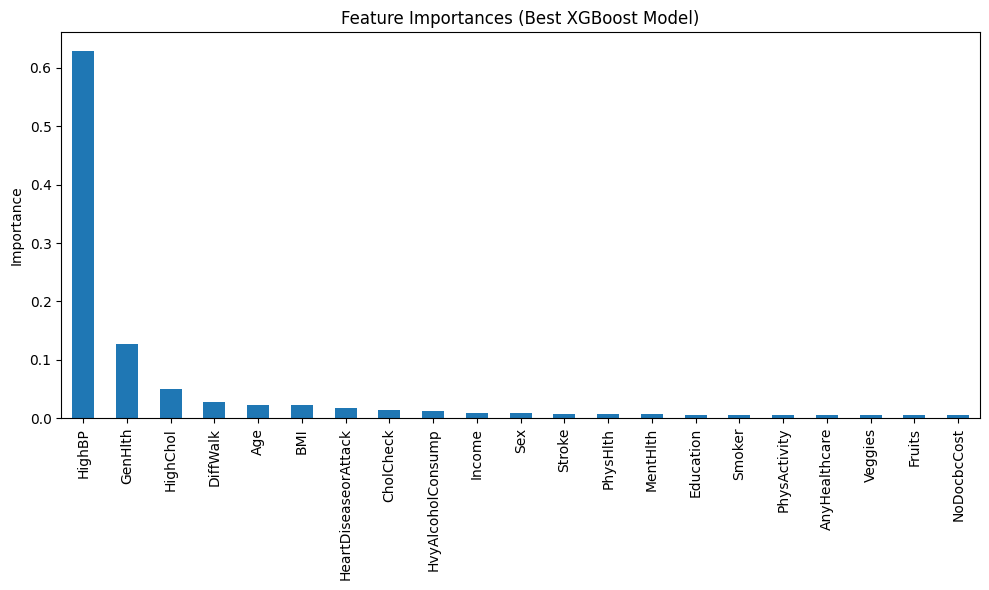

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Access the trained model
# The 'best_model' variable holds the fitted XGBoost classifier from the RandomizedSearchCV
trained_model = best_model

# Get feature importances
feature_importances = trained_model.feature_importances_

# Get feature names (assuming X_train contains the feature names)
feature_names = X_train.columns

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance
sorted_importance = importance_series.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances (Best XGBoost Model):")
print(sorted_importance)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar')
plt.title("Feature Importances (Best XGBoost Model)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()